ModuleNotFoundError: No module named 'seaborn'

In [2]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------- ------------------------------ 71.7/294.9 kB 1.3 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: C:\Users\kesharaju himabindu\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


lr  MSE: 131.99574575081698, Score: 0.9672937151257295
rd  MSE: 131.99625903139344, Score: 0.9672935879435945
ls  MSE: 143.82689461175062, Score: 0.9643621590908397
dtr  MSE: 27.989, Score: 0.993064805216722
rfr  MSE: 6.929735833333332, Score: 0.9982829301582469


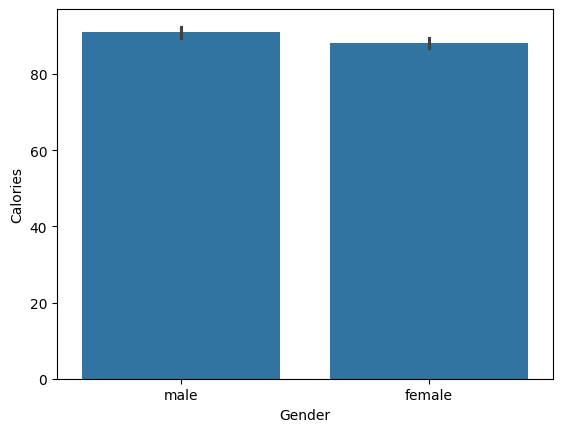

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

df = exercise.merge(calories, on='User_ID')

# Bivariate and Multivariate Analysis

# Bar Plot (Numerical - Categorical)
sns.barplot(x='Gender', y='Calories', data=df)

# Boxplot (numerical to categorical)
# sns.boxplot(df['Gender'], df['Age'])

# Distplot (Numerical - Categorical)
# sns.distplot(df[df['Gender']=='Male']['Age'])

# Lineplot (Numerical - Numerical)
# sns.lineplot(df['Age'], df['Calories'])

# Encoding
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

# Train test split
X = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

models = {
    'lr': LinearRegression(),
    'rd': Ridge(),
    'ls': Lasso(),
    'dtr': DecisionTreeRegressor(),
    'rfr': RandomForestRegressor()
}

for name, mod in models.items():
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)

    print(f"{name}  MSE: {mean_squared_error(y_test, y_pred)}, Score: {r2_score(y_test, y_pred)}")

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

import pickle

pickle.dump(rfr, open('rfr.pkl', 'wb'))
X_train.to_csv('X_train.csv')

lr MSE: 131.99574575081698, Score: 0.9672937151257295
rd MSE: 131.99625903139344, Score: 0.9672935879435945
ls MSE: 143.82689461175062, Score: 0.9643621590908397
dtr MSE: 27.635666666666665, Score: 0.9931523551645619
rfr MSE: 6.995552833333333, Score: 0.9982666218330102
Loaded model MSE: 7.145431833333333, Score: 0.9982294843840508


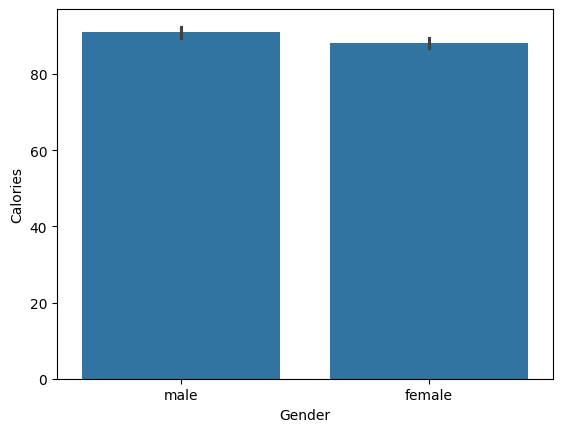

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load data
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

# Merge datasets
df = exercise.merge(calories, on='User_ID')

# Bivariate and Multivariate Analysis
sns.barplot(x='Gender', y='Calories', data=df)
# Additional plots as needed

# Encoding categorical variable
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

# Train-test split
X = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training models
models = {
    'lr': LinearRegression(),
    'rd': Ridge(),
    'ls': Lasso(),
    'dtr': DecisionTreeRegressor(),
    'rfr': RandomForestRegressor()
}

for name, mod in models.items():
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    print(f"{name} MSE: {mean_squared_error(y_test, y_pred)}, Score: {r2_score(y_test, y_pred)}")

# Save RandomForestRegressor model
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
with open('rfr.pkl', 'wb') as file:
    pickle.dump(rfr, file)

# Load and use the saved model
with open('rfr.pkl', 'rb') as file:
    loaded_rfr = pickle.load(file)
y_pred_loaded = loaded_rfr.predict(X_test)
print(f"Loaded model MSE: {mean_squared_error(y_test, y_pred_loaded)}, Score: {r2_score(y_test, y_pred_loaded)}")

# Save training data to CSV
X_train.to_csv('X_train.csv', index=False)
